<FONT COLOR="RED" SIZE="6">Embedded Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">3_Gradient Boosted_Trees</FONT>

*Gradient Boosted Trees (e.g., using libraries like XGBoost, LightGBM, or scikit-learn's HistGradientBoostingClassifier) provide robust feature importance by optimizing a loss function iteratively, with each tree focusing on errors from previous trees. This approach is more powerful than single decision trees and offers better generalization.*

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b><font color="orange">Gradient Boosting Classifier:</font></b>

The model is initialized with default parameters:
        <li>n_estimators=100: Number of boosting iterations.</li>
        <li>learning_rate=0.1: Step size at each iteration.</li>
        <li>max_depth=3: Maximum depth of individual trees.</li>

In [3]:
# Initialize Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)


In [4]:
# Train the model
gbt.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [5]:
# Get feature importances
feature_importances = gbt.feature_importances_

In [6]:
# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]


In [7]:
# Print sorted features and their importances
print("Feature Importances (Gradient Boosted Trees):")
for name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")


Feature Importances (Gradient Boosted Trees):
color_intensity: 0.2855
proline: 0.2843
od280/od315_of_diluted_wines: 0.2575
flavanoids: 0.0970
hue: 0.0293
magnesium: 0.0159
ash: 0.0116
proanthocyanins: 0.0055
malic_acid: 0.0053
alcohol: 0.0046
alcalinity_of_ash: 0.0036
total_phenols: 0.0000
nonflavanoid_phenols: 0.0000


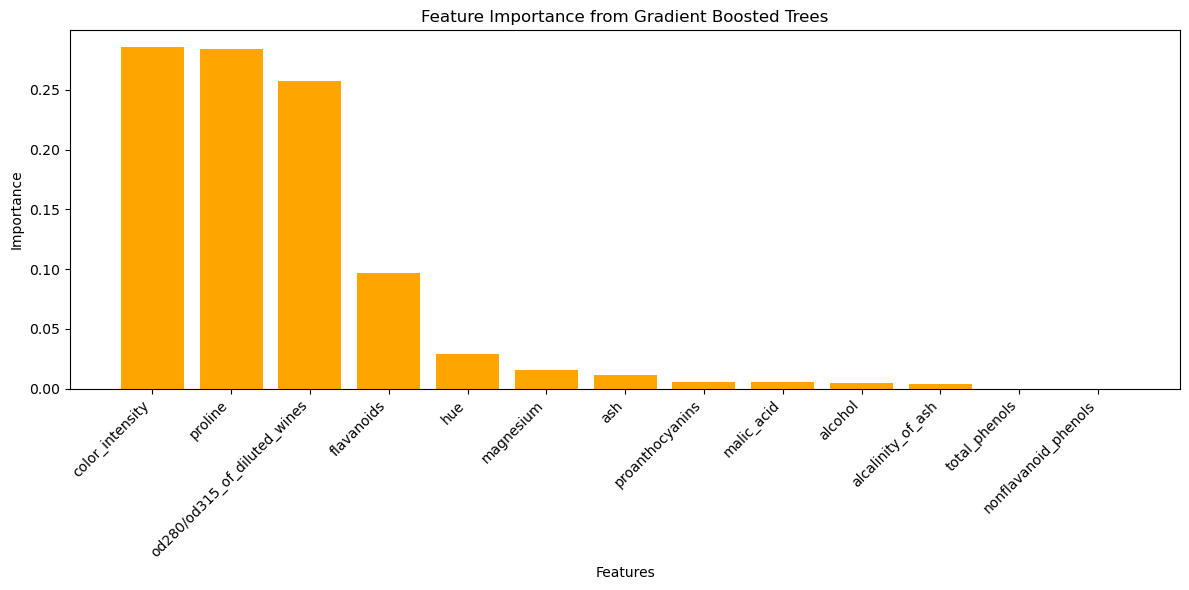

In [8]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names, sorted_importances, color="orange")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Gradient Boosted Trees")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [9]:
# Evaluate the model
accuracy = gbt.score(X_test, y_test)
print(f"Test accuracy of the Gradient Boosted Trees: {accuracy:.2f}")

Test accuracy of the Gradient Boosted Trees: 0.91


<b><font color="orange">Advantages of Gradient Boosted Trees:</font></b>

<li><b>Accuracy: </b>Often outperform single decision trees and random forests in predictive accuracy.</li>
    <li><b>Feature Selection:</b> Naturally selects the most important features during training.</li>
   <li> <b>Handles Non-linear Relationships:</b> Effectively models complex patterns.</li>

<b><font color="orange">Limitations:</font></b>

<li><b>Training Time:</b> Slower to train compared to simpler models or Random Forests.</li>
    <li><b>Hyperparameter Tuning:</b> May require fine-tuning to achieve optimal performance.</li>

<b><font color="orange">Extending the Approach:</font></b>

<li><b>Use XGBoost or LightGBM:</b>
        These libraries often offer faster training and additional options for handling categorical features and imbalanced data.</li>

<li><b>SHAP Values:</b>
        For a deeper understanding of feature importance, you can use SHAP (SHapley Additive exPlanations) to interpret individual predictions.</li>